## 1) La base de données

Base de données récupérée [ici](https://www.data.gouv.fr/fr/datasets/pesticides-dans-les-eaux-souterraines/) : site du gouvernement, data.gouv, base intitulée "Pesticides dans les eaux souterraines". 

Extrait du descriptif de la base de données:
Des informations sur la contamination des eaux souterraines par les pesticides sont régulièrement diffusées.
Elles s’appuient sur l’exploitation des données provenant du réseau de surveillance des nappes souterraines
qui comprend près de 2 200 stations de mesures réparties sur le territoire français (métropole et outremer).

Les ressources suivantes sont proposées :

- Caractéristiques des stations de mesures
- Caractéristiques des différents pesticides recherchés : herbicides, insecticides, fongicides, molécules
mère, métabolites, date éventuelle d’interdiction d’usage
- Caractéristiques des différentes masses d’eau souterraines suivies
- Résultats des exploitations des mesures effectuées pour chaque station pour les millésimes 2007 à
2012 : nombre de mesures par an, pesticides recherchés, concentrations moyenne annuelle, positionnement
par rapport aux normes en vigueur, etc.
- Résultats des exploitations des mesures effectuées pour chaque station pour les millésimes 2007 à
2012 : concentrations totales en pesticides et nombre de pesticides par stations

PB de dates (seulement entre 2007-2012), 2 solutions:
- on pondère par le type de pesticides et donc le temps qu'il reste dans l'eau
- on utilise ces données pour voir si ce sont la pollution des eaux souterraines joue comme cause de la conversion de la terre au BIO.

## 2) Importation de la base de données

In [11]:
import pandas as pd
import requests

url_1 = "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-223422/stations.csv"

# Télécharger le contenu du fichier
response = requests.get(url_1)
response.encoding = 'ISO-8859-1'  # Assurez-vous d'utiliser le bon encodage

# Lire les premières lignes
lines = response.text.splitlines()
for i, line in enumerate(lines[:10]):  # Affiche les 10 premières lignes
    print(f"Ligne {i+1}: {line}")

# les séparateurs sont des ;
# Les erreurs sont traitées, je peux avancer et associer les url à des df


Ligne 1: CD_STATION;NUM_COM;NOM_COM;NUM_DEP;codagence;ALTITUDE;PROFONDEUR_MAXI_POINT;Unité_coord_fictifs;X_FICT_L93;Y_FICT_L93;CD_ME_v2;CD_ME_niv1_surf;reseau2009;reseau2010;reseau2011;reseau2012;reseau2013;reseau2014;fi_ma_2007;fi_ma_2008;fi_ma_2009;fi_ma_2010;fi_ma_2011;fi_ma_2012;fi_ma_2013;fi_ma_2014;
Ligne 2: 06521X0019/SCE;01125;CORVEISSIAT;01;AERM&C;459;;01125_ _FRDG140;888869,8607;6577473,549;;DG140;Hors RCS et RCO;horsRCSRCODRIRE;;;;;oui;oui;oui;;;;;;
Ligne 3: 07015X0009/F;01133;CRESSIN-ROCHEFORT;01;AERM&C;229;15.2;01133_FRDG511_FRDG330;916062,9395;6525297,883;DG330;DG330;Hors RCS et RCO;;;;;;oui;;;;;;;;
Ligne 4: 07015X0010/P;01133;CRESSIN-ROCHEFORT;01;AERM&C;229,8;16;01133_FRDG511_FRDG330;915390,0333;6524380,237;DG330;DG330;Hors RCS et RCO;horsRCSRCODRIRE;;;;;;oui;;;;;;;
Ligne 5: 07011X0009/F;01138;CULOZ;01;AERM&C;236;17;01138_FRDG511_FRDG330;916376,604;6530993,354;DG330;DG330;Hors RCS et RCO;;;;;;oui;oui;oui;;;;;;
Ligne 6: 06991X0001/S;01142;DAGNEUX;01;AERM&C;196;22;01142_FR

Nous connaissons l'encodage du fichier et les séparateurs utilisés, nous pouvons donc désormais convertir les fichiers csv en dataframe.

In [ ]:

df_stations = pd.read_csv(url_1, encoding='ISO-8859-1', sep=";")

url_2 = "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-223615/pesticides.csv"
df_carac_pesticides = pd.read_csv(url_2, encoding='ISO-8859-1', sep=";")

url_3= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224359/moy_tot_quantif_2007.csv"
df_concentration_totale_2007 = pd.read_csv(url_3, encoding='ISO-8859-1', sep=";")

url_4= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224419/moy_tot_quantif_2008.csv"
df_concentration_totale_2008 = pd.read_csv(url_4, encoding='ISO-8859-1', sep=";")

url_5= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224434/moy_tot_quantif_2009.csv"
df_concentration_totale_2009 = pd.read_csv(url_5, encoding='ISO-8859-1', sep=";")

url_6= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224448/moy_tot_quantif_2010.csv"
df_concentration_totale_2010 = pd.read_csv(url_6, encoding='ISO-8859-1', sep=";")

url_7= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224458/moy_tot_quantif_2011.csv"
df_concentration_totale_2011 = pd.read_csv(url_7, encoding='ISO-8859-1', sep=";")

url_8= "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224528/moy_tot_quantif_2012.csv"
df_concentration_totale_2012 = pd.read_csv(url_8, encoding='ISO-8859-1', sep=";")

df_concentration_totale_2007.head(2)
df_concentration_totale_2010.head(2)



,ANNEE,CD_STATION,NBPREL,MOYPTOT,MAXPTOT,MINMOLRECH,MAXMOLRECH,MINMOLQ,MAQMOLQ
0,2007,00054X0169/F1,4,0,0,18,96,0,0
1,2007,00057X0245/F1,2,0,0,18,96,0,0


Nous essayons d'effectuer la cartographie à présent.

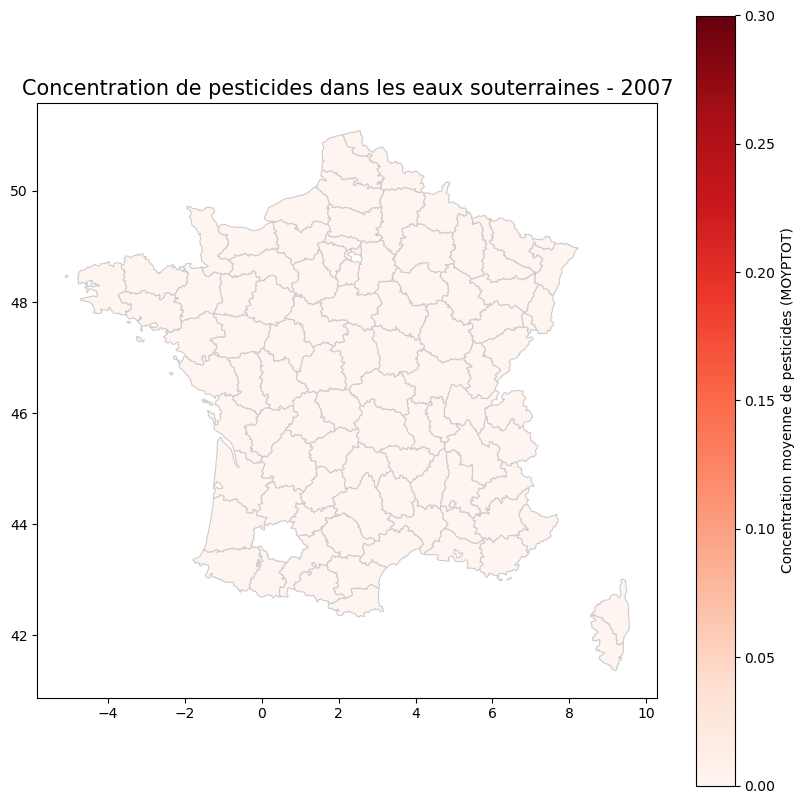

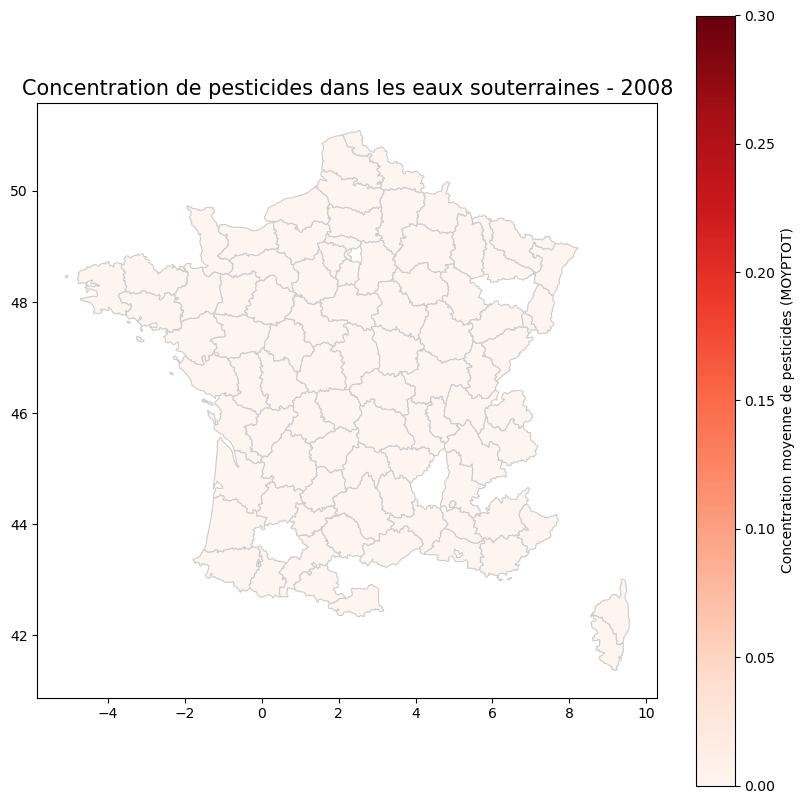

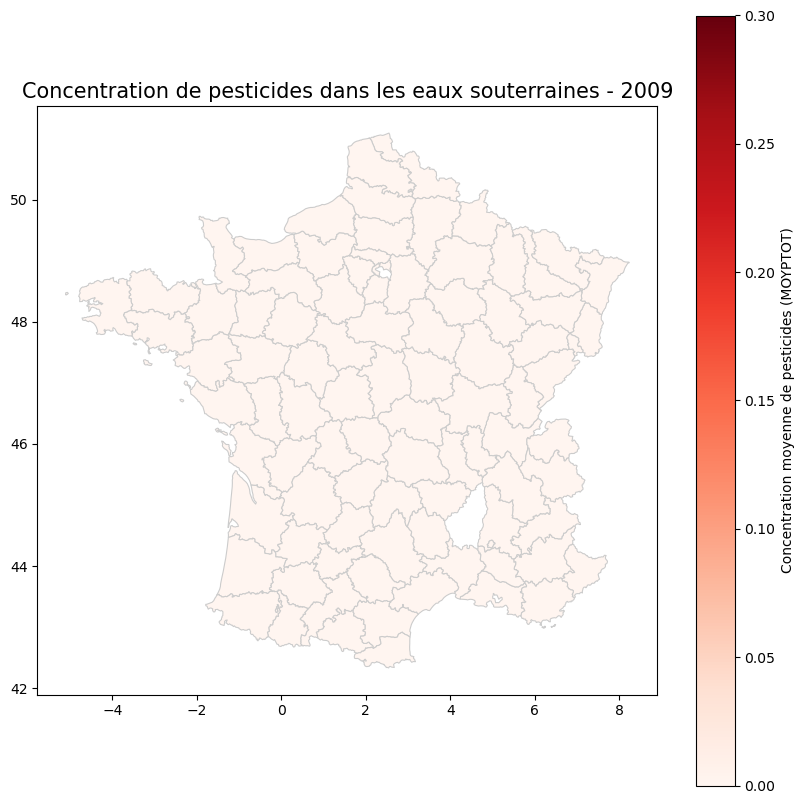

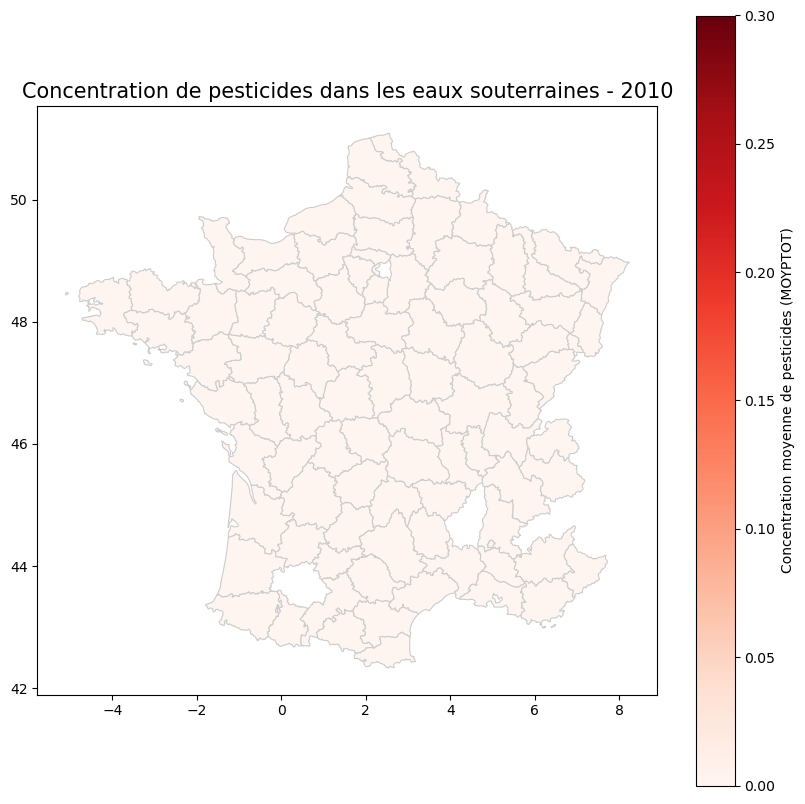

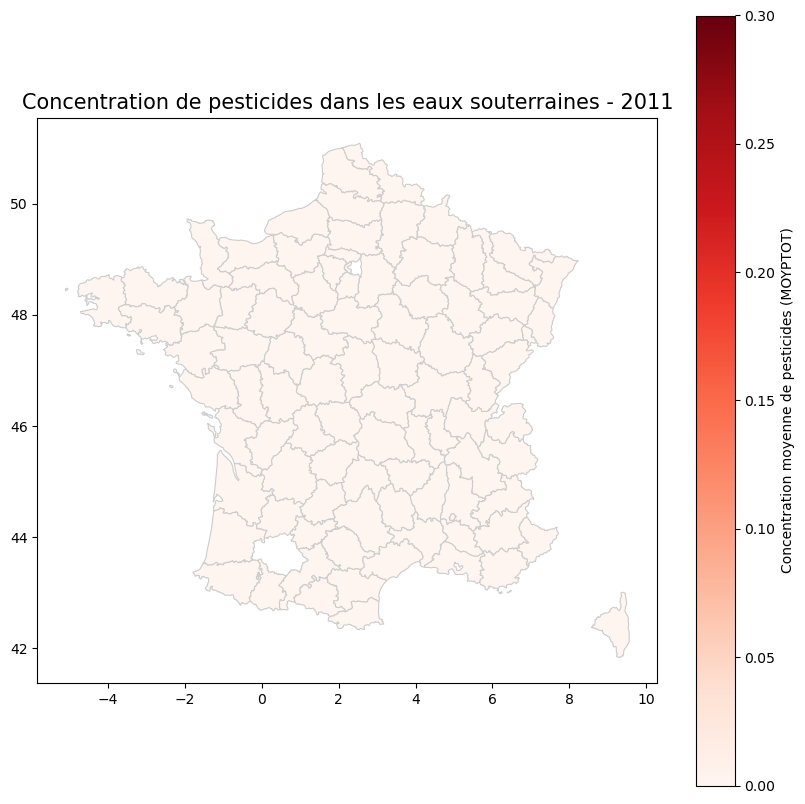

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger la carte des départements
geo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"
gdf_france = gpd.read_file(geo_url)

# Ajouter une clé de correspondance : CD_STATION -> Département
df_stations["departement"] = df_stations["NUM_DEP"]  # Associe le département à la station

# Liste des bases de données annuelles
data_urls = [
    (2007, df_concentration_totale_2007),
    (2008, df_concentration_totale_2008),
    (2009, df_concentration_totale_2009),
    (2010, df_concentration_totale_2010),
    (2011, df_concentration_totale_2011),
]

# Préparer les données pour chaque année
concentration_per_year = {}
for year, df in data_urls:
    # Associer les stations aux départements
    df = df.merge(df_stations[["CD_STATION", "departement"]], on="CD_STATION", how="left")
    
    # Conversion en valeur numérique des éléments de la colonne MOYPTOT (ce sont des string)
    df["MOYPTOT"] = pd.to_numeric(df["MOYPTOT"], errors="coerce")

    # On supprime les lignes avec les données manquantes
    df = df.dropna(subset=["MOYPTOT"])

    # Calculer la concentration moyenne par département
    df_by_dept = df.groupby("departement").agg({"MOYPTOT": "mean"}).reset_index()
    df_by_dept.rename(columns={"MOYPTOT": "concentration"}, inplace=True)
    
    # Stocker les données pour la cartographie
    concentration_per_year[year] = df_by_dept

# Code pour tracer la carte

for year, df_by_dept in concentration_per_year.items():
    # Fusionner les données avec la carte
    gdf_year = gdf_france.merge(df_by_dept, left_on="code", right_on="departement", how="left")
    
    # Tracer la carte
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_year.plot(column="concentration", cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
    ax.set_title(f"Concentration de pesticides dans les eaux souterraines - {year}", fontsize=15)
    plt.show()

   




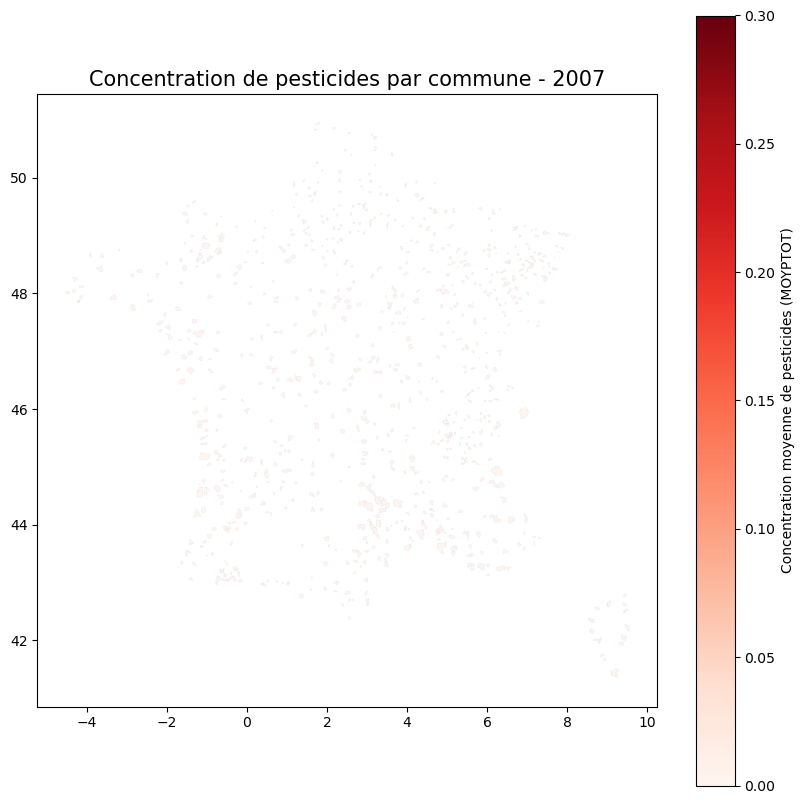

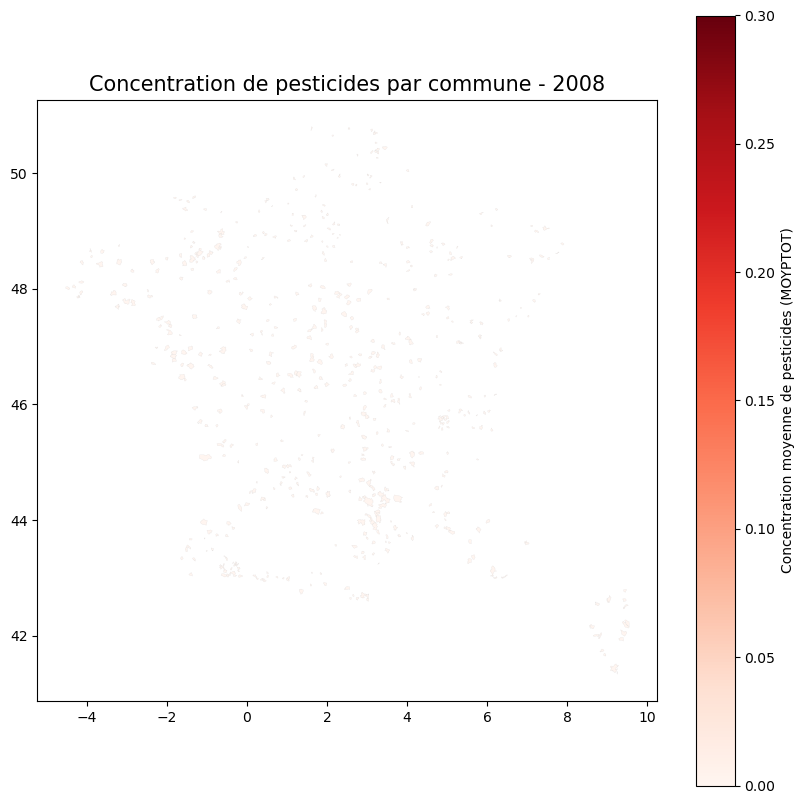

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# URLs des fichiers
url_stations = "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-223422/stations.csv"
urls = {
    2007: "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224359/moy_tot_quantif_2007.csv",
    2008: "https://static.data.gouv.fr/resources/pesticides-dans-les-eaux-souterraines/20170622-224419/moy_tot_quantif_2008.csv",
}

# Charger les données des stations
df_stations = pd.read_csv(url_stations, encoding='ISO-8859-1', sep=";")

# Charger la carte des communes françaises
geo_url_communes = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes.geojson"
gdf_communes = gpd.read_file(geo_url_communes)

# Préparer les données pour chaque année
concentration_per_year = {}
for year, url in urls.items():
    # Charger les données de l'année
    df_year = pd.read_csv(url, encoding='ISO-8859-1', sep=";")
    
    # Associer les stations aux communes via NUM_COM
    df_year = df_year.merge(df_stations[["CD_STATION", "NUM_COM"]], on="CD_STATION", how="left")
    
    # Convertir MOYPTOT en numérique
    df_year["MOYPTOT"] = pd.to_numeric(df_year["MOYPTOT"], errors="coerce")
    
    # Supprimer les valeurs manquantes
    df_year = df_year.dropna(subset=["MOYPTOT"])
    
    # Calculer la concentration moyenne par commune
    df_by_commune = df_year.groupby("NUM_COM").agg({"MOYPTOT": "mean"}).reset_index()
    df_by_commune.rename(columns={"MOYPTOT": "concentration", "NUM_COM": "commune"}, inplace=True)
    
    # Stocker les données pour la cartographie
    concentration_per_year[year] = df_by_commune

# Tracer les cartes pour chaque année
for year, df_by_commune in concentration_per_year.items():
    # Fusionner les données avec la carte des communes
    gdf_year = gdf_communes.merge(df_by_commune, left_on="code", right_on="commune", how="left")
    
    # Tracer la carte
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_year.plot(
        column="concentration",  # Colonne à cartographier
        cmap="Reds",  # Palette de couleurs
        linewidth=0.1,
        ax=ax,
        edgecolor="0.8",
        legend=True,
        legend_kwds={
            "label": "Concentration moyenne de pesticides (MOYPTOT)",
            "orientation": "vertical",
        },
        vmin=0,
        vmax=0.3,  # Ajuster selon vos données
    )
    ax.set_title(f"Concentration de pesticides par commune - {year}", fontsize=15)
    plt.show()
